<font size="6" color="green"><b>Seaborn Visualization - HousePricing Data</b></font>

<a href="http://seaborn.pydata.org/index.html">Seaborn</a> is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.



In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<font size="5" color="blue"><b>Getting the Data for Analysis</b></font>

In [6]:
train = pd.read_csv("Data/train.csv")
test = pd.read_csv("Data/test.csv")

In [7]:
train.shape

(1460, 81)

In [8]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,NaN,NaN,NaN,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,NaN,NaN,NaN,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [6]:
# Statistics of the sales price
print ("Statistics for the Sales Price")
print (train["SalePrice"].describe())

Statistics for the Sales Price
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<font size="5" color="blue"><b>Feature Extraction</b></font>

<font size="4" color="blue"><b> Part 1: Numerical Features<b></font>

In [19]:
numerical_features = train.select_dtypes(include=['float','int'])

<font size="3" color="green"><b>1. distplot - To flexibly plot a univariate distribution of observations<b></font>

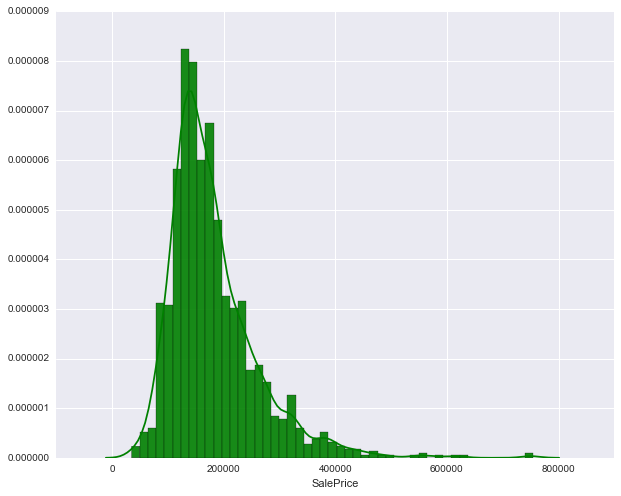

In [29]:
plt.figure(figsize=(10, 8))
sns.distplot(numerical_features["SalePrice"], color = 'g', hist_kws={'alpha': 0.9})

<font size="3" color="green"><b>2. Heatmap - Shows the correlation between all the features<b></font>

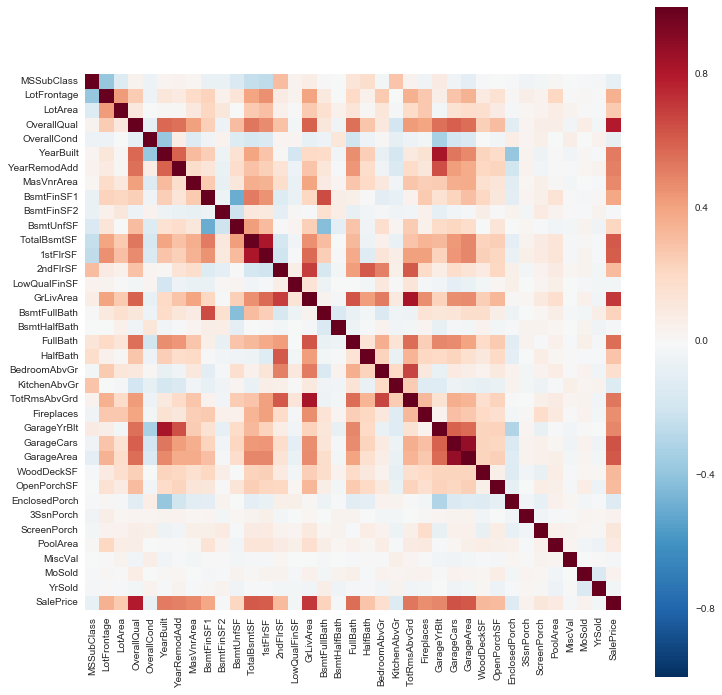

In [40]:
corr = train.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True)

<font size="3" color="green"><b>List the numerical features decending by their correlation with Sale Price<b></font>

In [49]:
import operator
cor_dict = corr['SalePrice'].to_dict()
del cor_dict['SalePrice']
for ele in sorted(cor_dict.items(),key=operator.itemgetter(1),reverse=True):
    print (ele)

('OverallQual', 0.79098160058380473)
('GrLivArea', 0.70862447761265113)
('GarageCars', 0.64040919725834899)
('GarageArea', 0.62343143891835984)
('TotalBsmtSF', 0.61358055155919444)
('1stFlrSF', 0.6058521846919166)
('FullBath', 0.5606637627484452)
('TotRmsAbvGrd', 0.53372315558202377)
('YearBuilt', 0.52289733287949669)
('YearRemodAdd', 0.50710096711138675)
('GarageYrBlt', 0.48636167748786213)
('MasVnrArea', 0.47749304709571072)
('Fireplaces', 0.46692883675152419)
('BsmtFinSF1', 0.38641980624215627)
('LotFrontage', 0.35179909657067854)
('WoodDeckSF', 0.32441344456813076)
('2ndFlrSF', 0.31933380283206614)
('OpenPorchSF', 0.31585622711605577)
('HalfBath', 0.2841076755947784)
('LotArea', 0.26384335387140628)
('BsmtFullBath', 0.22712223313149718)
('BsmtUnfSF', 0.214479105546969)
('BedroomAbvGr', 0.16821315430074149)
('ScreenPorch', 0.11144657114291048)
('PoolArea', 0.09240354949187278)
('MoSold', 0.046432245223819363)
('3SsnPorch', 0.044583665335747917)
('BsmtFinSF2', -0.011378121450215216)


The housing price correlates strongly with **OverallQual, GrLivArea(GarageCars), GargeArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, YearBuilt, YearRemodAdd, GargeYrBlt, MasVnrArea and Fireplaces.** 

<font size="3" color="green"><b>Explore Seaborn's .regplot() using highly correlated feature: OverallQual<b></font>

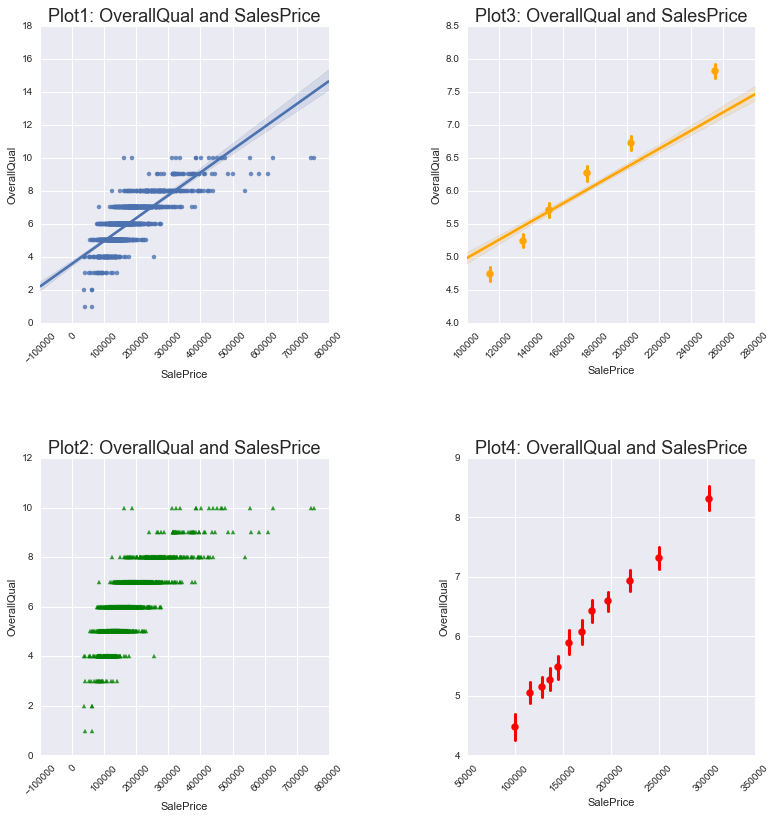

In [56]:
fig, axs = plt.subplots(2, 2, figsize = (12,12))
ax1 = plt.subplot2grid((8,8), (0,0), rowspan=3, colspan=3) 
ax2 = plt.subplot2grid((8,8), (4,0), rowspan=3, colspan=3)
ax3 = plt.subplot2grid((8,8), (0, 4), rowspan=3, colspan=3)
ax4 = plt.subplot2grid((8,8), (4, 4), rowspan=3, colspan=3)
fig.tight_layout() 
ax1.set_title("Plot1: OverallQual and SalesPrice", fontsize =18)
ax2.set_title("Plot2: OverallQual and SalesPrice", fontsize =18)
ax3.set_title("Plot3: OverallQual and SalesPrice", fontsize =18)
ax4.set_title("Plot4: OverallQual and SalesPrice", fontsize =18)
# Plot 1
sns.regplot(x='SalePrice', y='OverallQual', data=train, ax=ax1)
# Plot 2 
sns.regplot(x='SalePrice', y='OverallQual', data=train, fit_reg = False, color = 'green', marker ="^", ax=ax2)
# Plot 3 (Default Confidence Interval is 95%)
sns.regplot(x='SalePrice', y='OverallQual', data=train, fit_reg = True, x_bins = 6, color = 'orange', ax=ax3)
# Plot 4
sns.regplot(x='SalePrice', y='OverallQual', data=train, fit_reg = False, x_bins = 12, ci = 99, color = 'red', ax=ax4)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation= 45)
    
plt.show()

<font size="3" color="green"><b>Explore Seaborn's .regplot() using the top six highly correlated features <b></font>

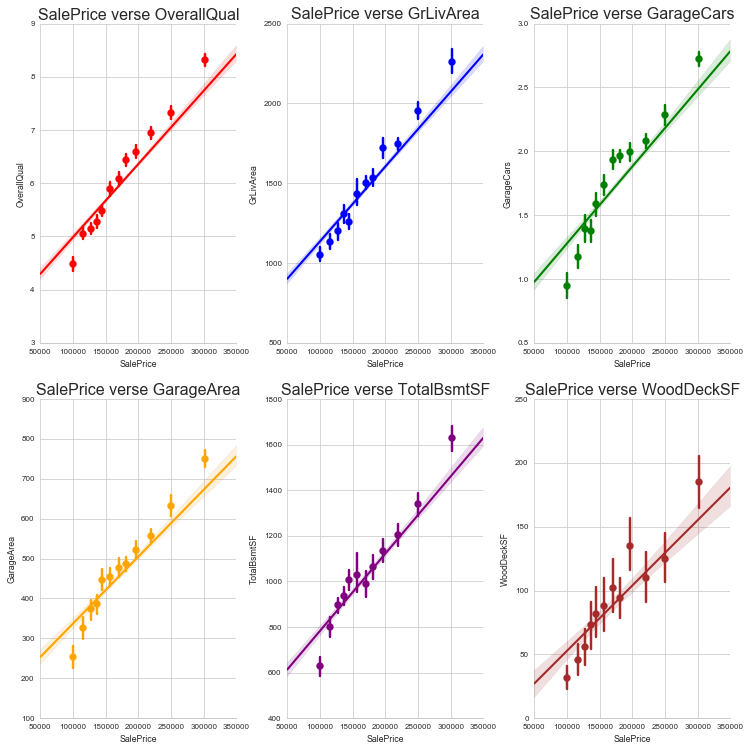

In [60]:
fig, axs = plt.subplots(4, 6, figsize = (10,10)) # I changed the figure size as well as the number 
# of rows and columns in my final figure because now I want a (2 x 3) display of images!

ax1 = plt.subplot2grid((4, 6), (0, 0), rowspan=2, colspan=2) 
ax2 = plt.subplot2grid((4, 6), (0, 2), rowspan=2, colspan=2)
ax3 = plt.subplot2grid((4, 6), (0, 4), rowspan=2, colspan=2)
ax4 = plt.subplot2grid((4, 6), (2, 0), rowspan=2, colspan=2)
ax5 = plt.subplot2grid((4, 6), (2, 2), rowspan=2, colspan=2)
ax6 = plt.subplot2grid((4, 6), (2, 4), rowspan=2, colspan=2)

# ^I changed the axs locations to match the new (2 x 3) display I want to use.


fig.tight_layout(pad = 0.4, w_pad = 3.0, h_pad = 4.0) # To understand how this works see point and link 3 
# of the previous plot

ax1.set_title("SalePrice verse OverallQual", fontsize =16)
ax2.set_title("SalePrice verse GrLivArea", fontsize =16)
ax3.set_title("SalePrice verse GarageCars", fontsize =16)
ax4.set_title("SalePrice verse GarageArea", fontsize =16)
ax5.set_title("SalePrice verse TotalBsmtSF", fontsize =16)
ax6.set_title("SalePrice verse WoodDeckSF", fontsize =16)

# ^The above code purely sets the title of each graph and the fontsize

sns.regplot(x='SalePrice', y='OverallQual', 
              data=train, x_bins = 12, fit_reg = True, ci = 90, color = 'red', ax=ax1) 

sns.regplot(x='SalePrice', y='GrLivArea', 
              data=train, x_bins = 12, fit_reg = True, ci = 90, color = 'blue', ax=ax2)

sns.regplot(x='SalePrice', y='GarageCars', 
              data=train, x_bins = 12, fit_reg = True, ci = 90, color = 'green', ax=ax3)

sns.regplot(x='SalePrice', y='GarageArea', 
              data=train, x_bins = 12, fit_reg = True, ci = 90, color = 'orange', ax=ax4)

sns.regplot(x='SalePrice', y='TotalBsmtSF', 
              data=train, x_bins = 12, fit_reg = True, ci = 90, color = 'purple', ax=ax5)

sns.regplot(x='SalePrice', y='WoodDeckSF', 
              data=train, x_bins = 12, fit_reg = True, ci = 90, color = 'brown', ax=ax6)

sns.set(style="whitegrid") # aesthetics
sns.despine(left=True) # aesthetics
sns.set_context("paper") # aesthetics

plt.show()

^ The above graphs provide some great insight into how the SalePrice changes. For example, based on the slope of the lines, we can see that SalePrice and WoodDEckSF are the least correlated variables out of all the stat options. We can also use the graphs and bin confidence intervals to get a rough predictive price of house.

For example, I can roughly estimate (with a 90% confidence) that a House with a SalePrice of 200K will have an OverallQual between 6.5 and 7, a GrLivArea between 1750 and 2000sqft, and a TotalBsmtSF between 1350 and 1400! That's some cool analysis! If I wanted even greater confidence intervals (say 99%) I would simply change the [ci =] command in the parameter section of each of the six sns.regplot()'s.

<font size="3" color="green"><b>Scatter Plot Showing the SalePrice Verus the YearBuilt  <b></font>

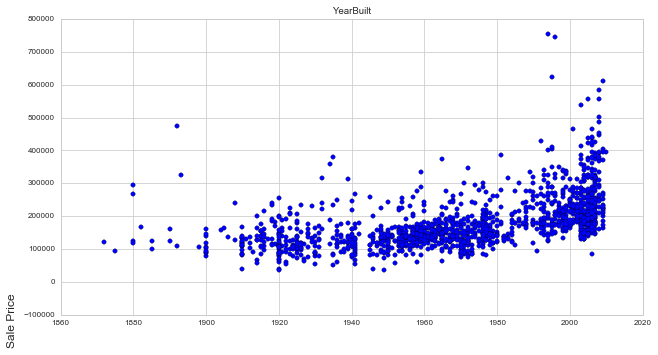

In [69]:
fig = plt.figure(1, figsize=(9, 9))
plt.subplot(211)
plt.scatter(train.YearBuilt.values, train.SalePrice)
plt.title('YearBuilt')


fig.text(-0.01, 0.5, 'Sale Price', va = 'center', rotation = 'vertical', fontsize = 12)

plt.tight_layout()

<font size="3" color="green"><b>Bivariate KDE Plot(Kernel Density Plots) <b></font>

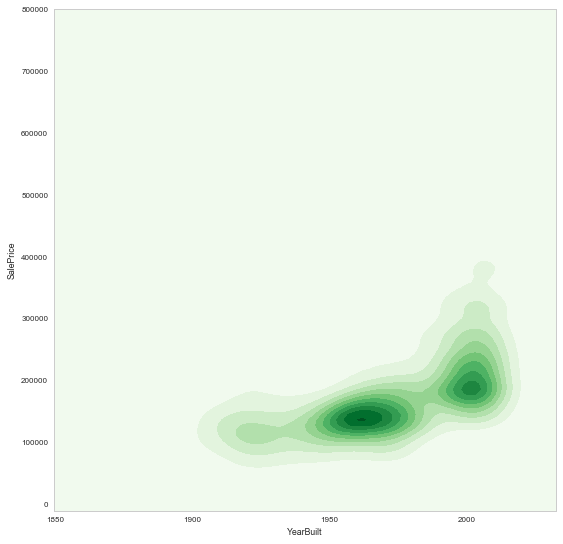

In [89]:
fig = plt.figure(1, figsize=(9, 9))
sns.kdeplot(train.YearBuilt, train.SalePrice, shade = True, cmap = "Greens")

<font size="4" color="blue"><b> Part 2: Categorical Features<b></font>

In [71]:
categorical_features = train.select_dtypes(include=['object'])

In [90]:
categorical_features.head(3)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


<font size="3" color="green"><b>Neighbourhood Feature - BoxPlot <b></font>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

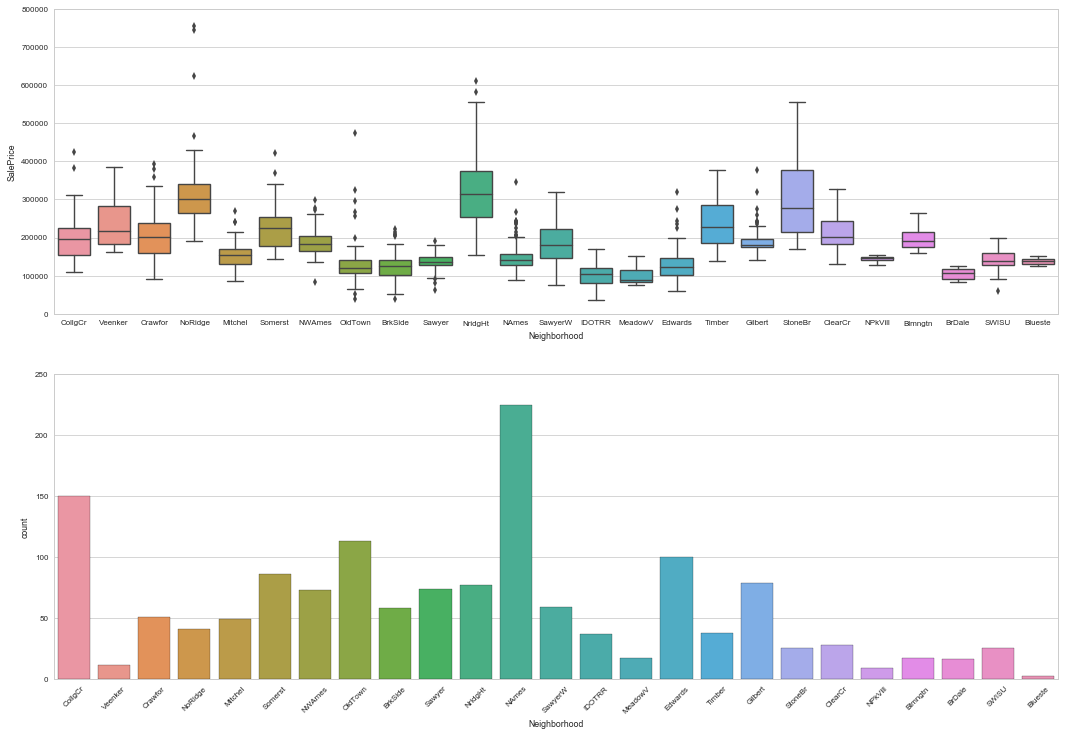

In [98]:
fig, ax = plt.subplots(2, 1, figsize = (18, 12))
sns.boxplot(x = 'Neighborhood', y = 'SalePrice',  data = train,ax=ax[0])
sns.countplot(x = 'Neighborhood',  data = train,ax=ax[1])
plt.xticks(rotation= 45)

The boxplot and the countplot reveal some interesting points. From the boxplot, we can see that the neighbourhood "NridgHt" has the highest average SaleProce as compared to the other neighbourhood.The count plot reveals that the number of houses for sales are more in the "NAmes" neighbourhood as compared to the others.

<font size="3" color="green"><b>More BoxPlots <b></font>

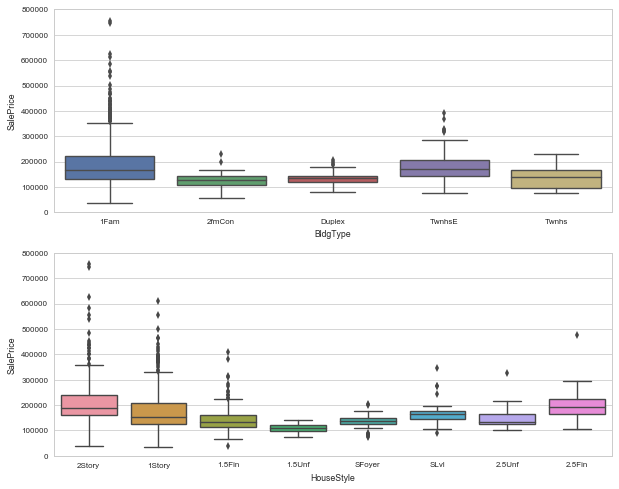

In [99]:
fig, ax = plt.subplots(2, 1, figsize = (10, 8))
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = train, ax = ax[0])
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = train, ax = ax[1])

<font size="3" color="green"><b>Different Approach With .swarmplot() <b></font>

So the box plots are a great way to visualize each type by specific stats, but it doesn't help us know the densities of each type in the data. For example, are any of the box plots constructed with only several points, thus potentially unreliable? Well .swarmplot() helps us see the densities of each type as well as the range of values.

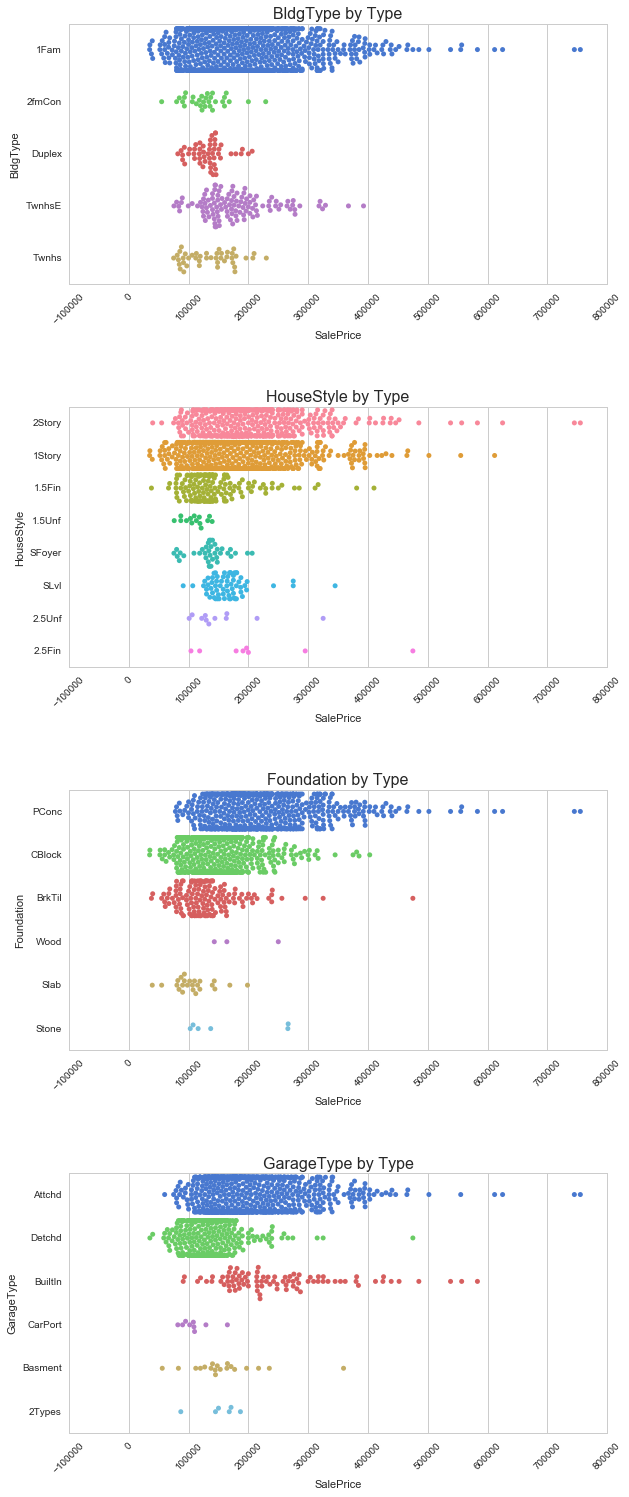

In [117]:
fig, axs = plt.subplots(4, 1, figsize = (8,20))

ax1 = plt.subplot2grid((4, 1), (0, 0)) 
ax2 = plt.subplot2grid((4, 1), (1, 0))
ax3 = plt.subplot2grid((4, 1), (2, 0))
ax4 = plt.subplot2grid((4, 1), (3, 0))

fig.tight_layout(pad = 0.4, w_pad = 3.0, h_pad = 8.5)

ax1.set_title("BldgType by Type", fontsize =16)
ax2.set_title("HouseStyle by Type", fontsize =16)
ax3.set_title("Foundation by Type", fontsize =16)
ax4.set_title("GarageType by Type", fontsize =16)


# The code for the swarmplots are exactly the same as the box plots, just with .swarmplot as the 
# function instead of .boxplot

sns.swarmplot(x = "SalePrice", y = "BldgType", data = train, ax=ax1)
sns.swarmplot(x = "SalePrice", y = "HouseStyle", data = train, ax=ax2)
sns.swarmplot(x = "SalePrice", y = "Foundation", data = train, ax=ax3)
sns.swarmplot(x = "SalePrice", y = "GarageType", data = train, ax=ax4)

sns.set_context("paper") # aesthetics
sns.set(style="whitegrid", palette="muted")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation= 45)
    
plt.show()

<font size="3" color="green"><b>FactorPlot <b></font>

The below factor plot shows the HeatingQC opposed to the Salesprice factored by whether it has central Air or not. As you can see the prices are higher for the houses which have excellent HeatingQC with a CentralAir.

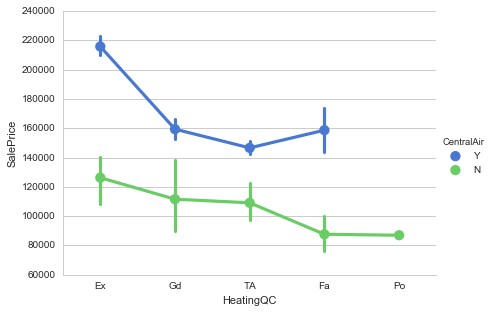

In [115]:
import numpy as np
sns.factorplot('HeatingQC', 'SalePrice', hue = 'CentralAir', estimator = np.mean, data = train, 
             size = 4.5, aspect = 1.4)

<font size="3" color="green"><b>BoxPlot + CountPlot (To Check the density of data points along with the boxplot) <b></font>

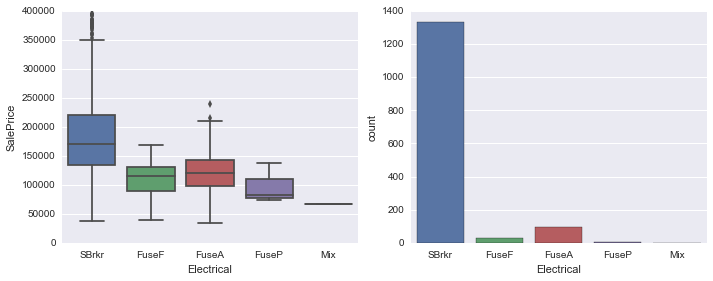

In [128]:
fig, ax = plt.subplots(1, 2, figsize = (10, 4))
sns.boxplot('Electrical', 'SalePrice', data = train, ax = ax[0]).set(ylim = (0, 400000))
sns.countplot('Electrical', data = train)
plt.tight_layout()

<font size="3" color="green"><b>Another Adventure with Jointplot() <b></font>

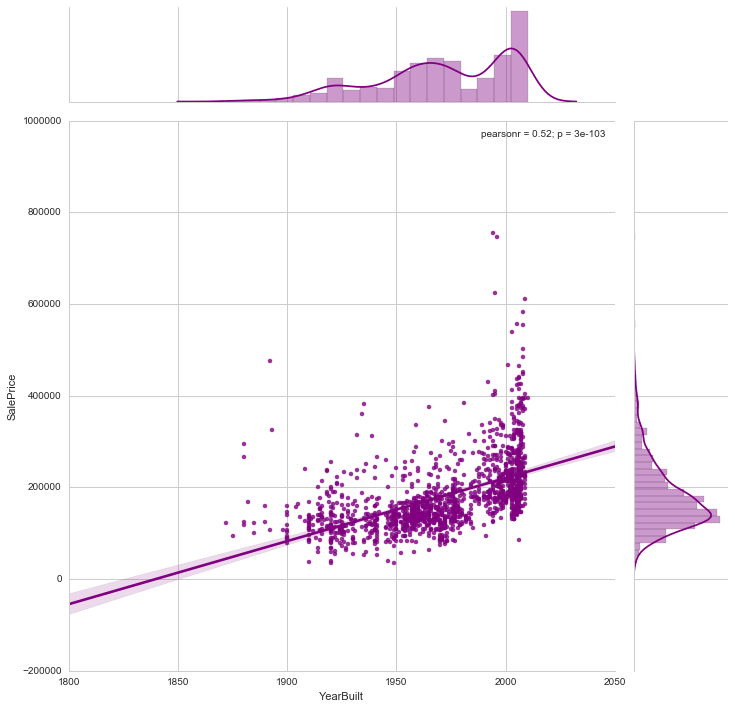

In [124]:
# Next I'll demonstrate the [kind = 'reg'] feature. "Reg" stands for regression, so notice
# the graph now has a regression on BOTH the density plots and the scatter plot.

sns.jointplot(x='YearBuilt', y='SalePrice', 
              data=train, color ='purple', kind ='reg', 
              size = 10.0)
plt.show()

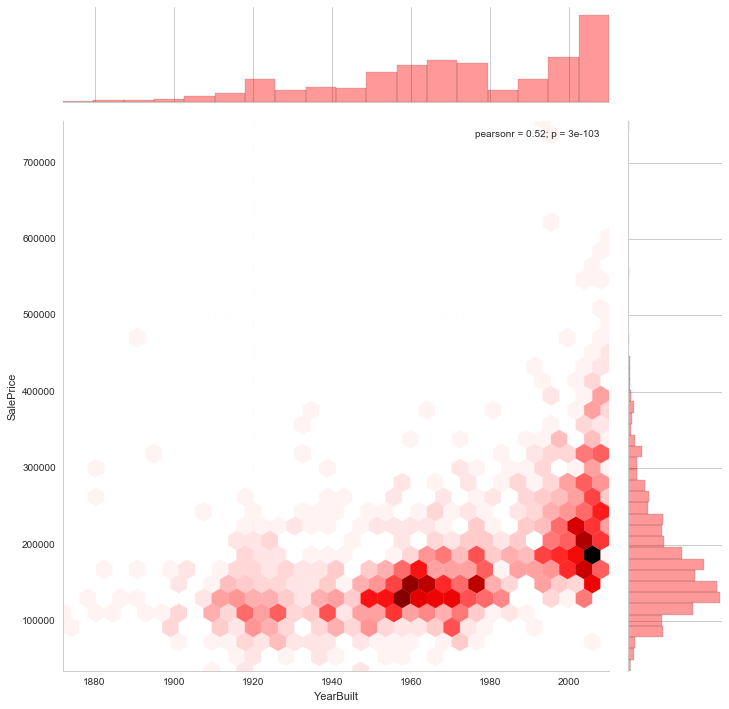

In [127]:
# Finally we'll look at the 'hex' option under [kind =]. This is my favorite visualization in 
# the .jointplot() function.

sns.jointplot(x='YearBuilt', y='SalePrice', 
              data=train, color ='red', kind ='hex', 
              size = 10.0)
plt.show()

<font size="4" color="blue"><b>Data - Missing Values<b></font>

In [163]:
stats = pd.DataFrame(train.isnull().sum(),columns=['Count'])
stats['Columns'] =stats.index
stats = stats[stats['Count']>0]

Figure Showing the Number of Missing Values


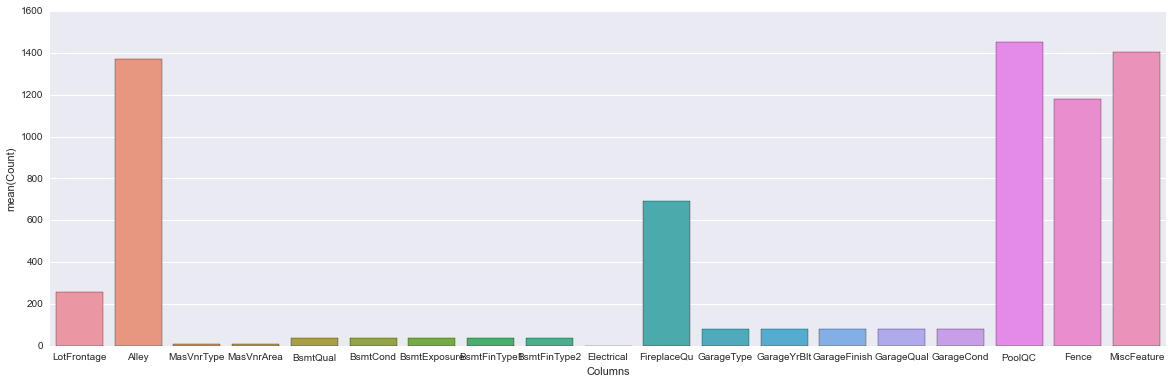

In [164]:
print ("Figure Showing the Number of Missing Values")
fig = plt.subplots(figsize = (20, 6))
sns.barplot(x='Columns',y='Count',data=stats)